## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.

### 2 Missing at Random, MAR:
Missing at random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on available information and not on the value of the variable that is missing. In other words, the missingness is random after accounting for the other variables.

For example, in a survey about the prevalence of a certain disease, the missing data might be MAR if the survey participants with missing values for certain questions were selected randomly, but the missing responses are related to their disease status or other variables measured in the survey.

### 3 Missing Not at Random, MNAR:

Missing not at random (MNAR) is a type of missing data mechanism in which the probability of a value being missing depends on information that has not been recorded, and this mechanism is not ignorable. In other words, the missingness is related to the value of the variable that is missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MNAR if the survey participants with missing values for certain questions were selected non-randomly, and the missing responses are related to their disease status or other variables measured in the survey.

### better example

Sure, let's provide more concrete examples for each type of missing data:

1. **Missing Completely at Random (MCAR)**: This is when the fact that the data is missing is independent of the observed and unobserved data. 

   For example, let's say you have a dataset of student grades and some of the grades are missing because during the data entry process, some rows were accidentally skipped. The missingness of the grades has nothing to do with the actual grades (observed data) or any other factors like student's diligence, intelligence, etc. (unobserved data).

2. **Missing at Random (MAR)**: This is when the missingness of data is related to some of the observed data, but not the missing data.

   For example, suppose you have a health survey and younger participants consistently skip a question about chronic disease status. The missingness in this case is related to age (an observed data) but not related to the actual status of chronic disease (the missing data).

3. **Missing Not at Random (MNAR)**: This is when the missingness of data is related to the missing data itself, even after accounting for the observed data.

   For example, in a survey measuring income level, higher earners might be less likely to disclose their earnings. Here, the missingness of income data is related to the actual value of the income (the missing data).

Remember, understanding the type of missingness you're dealing with is important as it informs the strategy you should use to handle the missing values.


In data analysis, handling missing values is a crucial step that can significantly impact the results. Here's a more detailed explanation with examples:

A "missing value" refers to the absence of a data point in a column of a dataset. This could occur due to various reasons such as data entry errors, respondents not willing to share information, or measurements that were not recorded.

For instance, consider a survey dataset about people's eating habits. If some respondents chose not to answer the question "How many fruits do you eat in a week?", then the dataset will have missing values in that particular column.

Handling missing values is important because they can lead to incorrect or misleading statistics and machine learning model predictions. Here are some strategies to handle missing values:

1. **Deleting Rows**: If the number of missing values is small, you might choose to remove the rows with missing values. For example, if only 5 out of 1000 respondents didn't answer the fruit question, you might exclude them.

    ```python
    import pandas as pd

    # Assuming df is your DataFrame and 'fruits' is your column of interest
    df = df.dropna(subset=['fruits'])
    ```

2. **Imputation**: If you can't afford to lose data, you might fill the missing values based on other data. For instance, you could fill in the missing fruit values with the average number of fruits eaten per week by all respondents.

    ```python
    # Fill NA/NaN values using the specified method
    df['fruits'].fillna(df['fruits'].mean(), inplace=True)
    ```

3. **Prediction Models**: If your dataset is large and patterns can be detected, you could use machine learning models to predict the missing values. For example, if people who exercise regularly also tend to eat more fruits, you could use this information to fill in missing values.

    ```python
    from sklearn.linear_model import LinearRegression

    # Split your data into sets with missing values and without
    train_data = df[df['fruits'].notna()]
    test_data = df[df['fruits'].isna()]

    # Fit your model on the data without missing values
    model = LinearRegression().fit(train_data[['exercise']], train_data['fruits'])

    # Predict and fill missing values in the 'fruits' column
    test_data['fruits'] = model.predict(test_data[['exercise']])
    ```

4. **Ignoring the missing values**: If the values are missing randomly and the percentage of missing values is very small, they can be ignored. This is generally not recommended unless you're sure that the missing data is not informative.

Remember, the strategy you choose depends on the nature of your data and the specific situation. Always consider the implications of your choice on your final analysis or model.

In [2]:
import seaborn as sns
import numpy as numpy
import pandas as pd

In [3]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
## checking missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.shape

(891, 15)

In [7]:
df.dropna().shape

(182, 15)

In [8]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values

<Axes: >

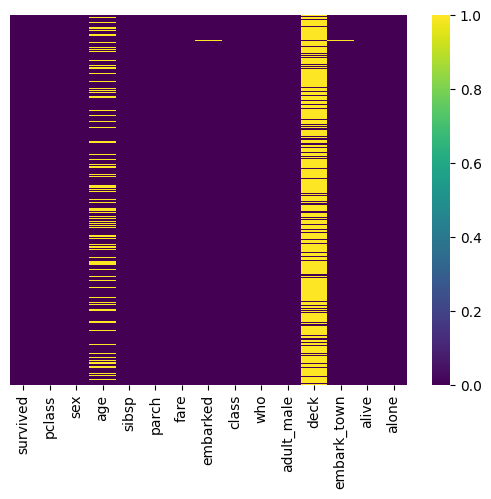

In [11]:
## Mean value Imputation
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<Axes: xlabel='pclass', ylabel='age'>

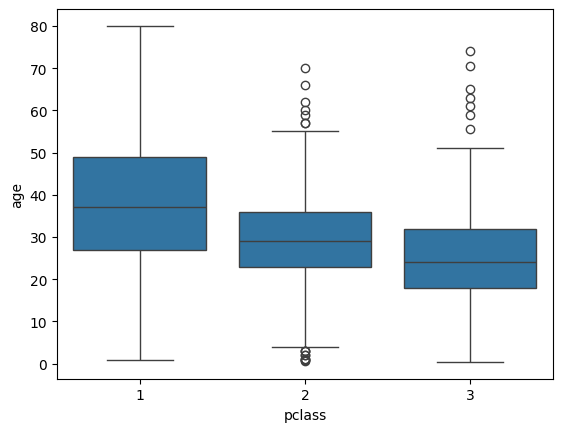

In [12]:
sns.boxplot(x='pclass',y='age',data=df)

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

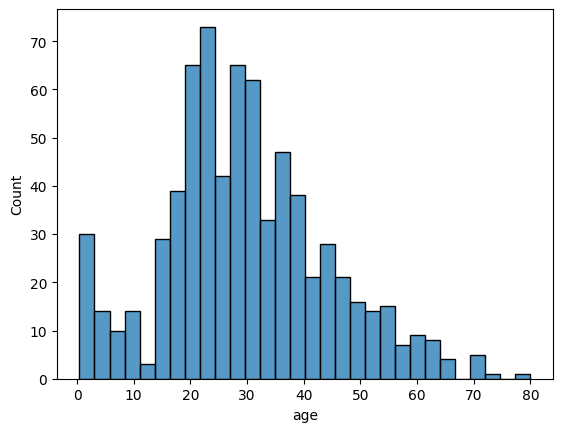

In [4]:
# `sns.histplot(df['age'].dropna(),kde=False,bins=30)` is creating a histogram plot of the 'age' column in the DataFrame 'df'. The `dropna()` function is used to remove any missing values from the 'age' column before plotting. The `kde=False` argument specifies that the plot should not include a kernel density estimate. The `bins=30` argument specifies that the histogram should be divided into 30 bins.
sns.histplot(df['age'].dropna(),kde=False,bins=30)

In [5]:
df['age'].dropna().count()

714

<Axes: xlabel='age', ylabel='Count'>

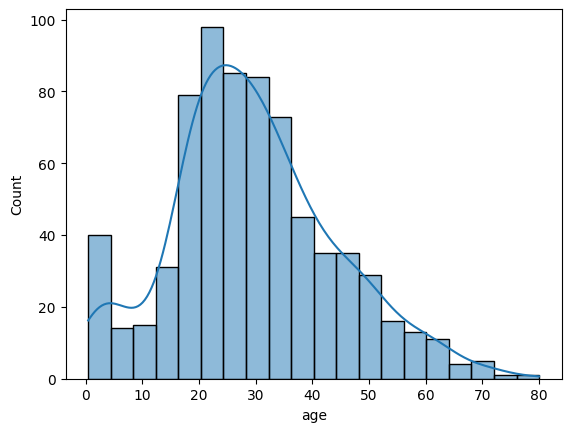

In [6]:
sns.histplot(df['age'],kde=True)

In [7]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [11]:
df[["Age_mean","age"]].head(10)

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
5,29.699118,NaN
6,54.000000,54.0
7,2.000000,2.0
8,27.000000,27.0
9,14.000000,14.0


<Axes: xlabel='Age_mean', ylabel='Count'>

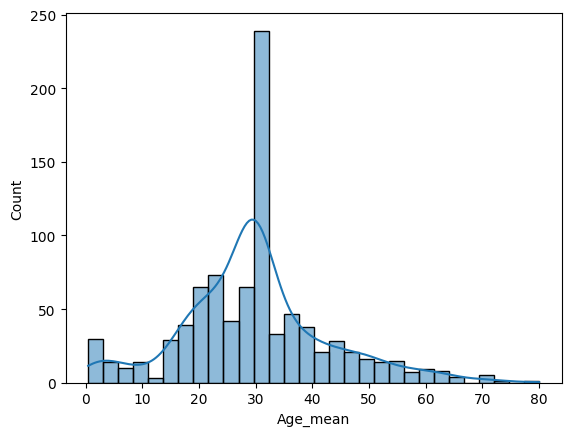

In [12]:
sns.histplot(df['Age_mean'],kde=True)

#### MEan Imputation Works Well when we have normally distributed data

#### Median Imputation Works Well when we have Skewed data/ Outliers

In [13]:
df['age_median']= df['age'].fillna(df['age'].median())

In [14]:
df[['age_median','age']].head(10)

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,28.0,NaN
6,54.0,54.0
7,2.0,2.0
8,27.0,27.0
9,14.0,14.0


<Axes: xlabel='age_median', ylabel='Count'>

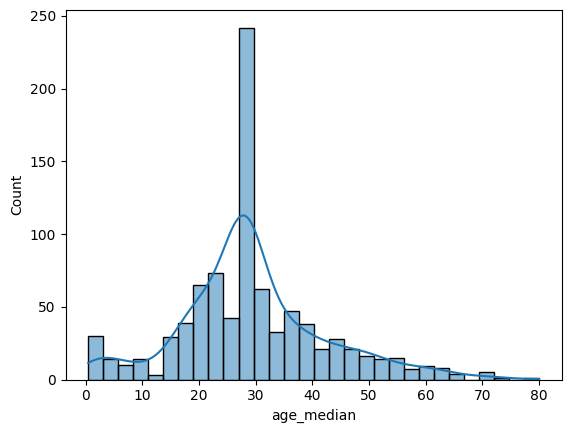

In [15]:
sns.histplot(df['age_median'],kde=True)

In [16]:
df[['age_median','Age_mean','age']]

,age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


#### Mode Imputation Works Well when we have Categorical Data.
 `Categorical data` refers to data that is divided into categories or groups. It represents qualitative variables that can be divided into distinct groups or categories, such as colors, types of animals, or levels of education. In the context of mode imputation, categorical data is used to fill in missing values by replacing them with the most frequently occurring category in the dataset.


In [17]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [18]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [26]:
mode_value

'S'

In [27]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [28]:
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


<Axes: xlabel='embarked_mode', ylabel='Count'>

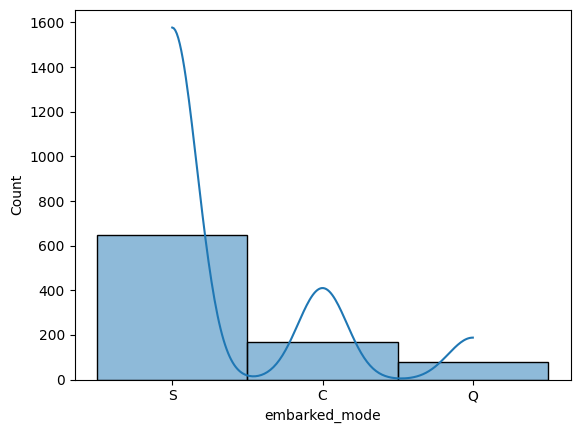

In [29]:
sns.histplot(df['embarked_mode'],kde=True)